In [1]:
import sys, os, json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
model_dir = f"/home/beckerf/brain/deepfinder/exclude_primates/weights"
#model_dir = f"~/brain/deepfinder/exclude_primates/weights"
#model_runs = ["clamsa_lstm_zero", "clamsa_lstm_zero/2"]
#model_runs = ["lstm_clamsa_small", "lstm_clamsa_small/2"]
#model_runs = ["lstm_small", "lstm_small/2"]
#model_runs = ["hmm_small"]
#model_runs = ["hmm_finetuning_lstm_best_emb"]
#model_runs = ["lstm2", "lstm2/2"]
model_runs = ["lstm_hmm_new_3", "lstm_hmm_new_3/2"]
#model_runs = ["lstm_hmm_finetuned_9", "lstm_hmm_finetuned_9/2"]
#model_runs = ["lstm_hmm_finetuned_12"]
model_runs = ["lstm_hmm_clamsa"]
#model_runs = ["lstm_hmm_finetuned_9"]
log_data = []
for model in model_runs:
    log_data.append(pd.read_csv(f'{model_dir}/{model}/training.log', sep=';'))
breakpoints = [log["epoch"].iloc[-1] for log in log_data]
breakpoints = np.cumsum(breakpoints)[:-1]
log_data = pd.concat(log_data, axis=0, ignore_index=True)
log_data = log_data.iloc[0:70]

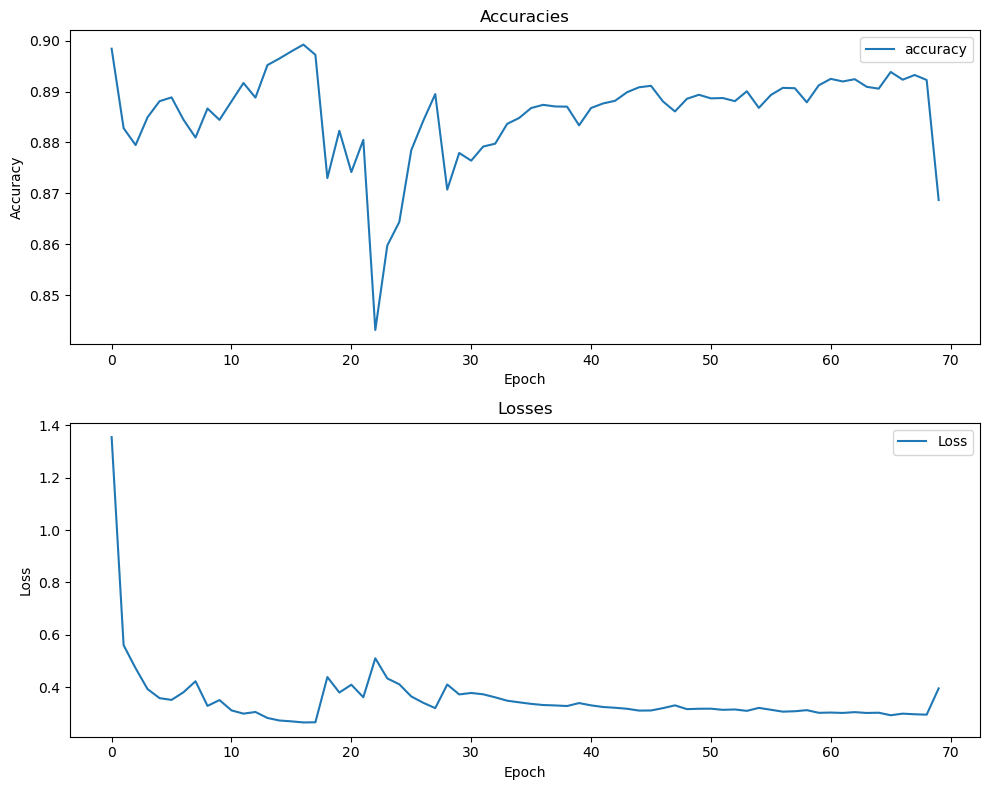

num_epochs 2000
use_hmm True
loss_weights False
stride 0
units 372
filter_size 128
numb_lstm 2
numb_conv 3
dropout_rate 0.0
lstm_mask False
pool_size 9
lr 0.0001
warmup 1
min_lr 0.0001
batch_size 512
w_size 9999
filter False
trainable_lstm True
output_size 15
multi_loss False
l2_lambda 0.0
temperature 96
initial_variance 0.1
hmm_factor 99
seq_weights False
softmasking True
residual_conv True
hmm_loss_weight_mul 0.1
hmm_emit_embeddings False
hmm_dense 32
hmm_share_intron_parameters False
hmm_nucleotides_at_exons False
hmm_trainable_transitions False
hmm_trainable_starting_distribution False
hmm_trainable_emissions False
neutral_hmm False
constant_hmm False
num_hmm_layers 1
clamsa True
clamsa_kernel_size 7
clamsa_emb_size 32
clamsa_with_lstm True
loss_f1_factor 2.0
sgd False
oracle False
lru_layer False
model_load /home/beckerf/gene_pred_deepl/test_data/lstm_clamsa/epoch_124
model_save_dir /home/beckerf/deepfinder/exclude_primates/weights/lstm_hmm_clamsa
model_load_lstm None
model_load_h

In [9]:
with_prior = False
with_validation = any("val" in x for x in log_data.columns)
mark_training_breakpoints = True
multi_loss = with_validation and log_data.shape[-1] == 13 or not with_validation and log_data.shape[-1] == 7

if with_prior:
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8)) 
else:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8)) 

# Plotting accuracies
#ax1.plot(log_data.index, log_data['tf.linalg.matmul_1_accuracy'], label='HMM accuracy') 
if multi_loss:
    ax1.plot(log_data.index, log_data['lstm_out_accuracy'], label='LSTM accuracy')
    ax1.plot(log_data.index, log_data['gene_pred_hmm_layer_accuracy'], label='HMM accuracy') 
    if with_validation:
        ax1.plot(log_data.index, log_data['val_lstm_out_accuracy'], label='val LSTM accuracy')
        ax1.plot(log_data.index, log_data['val_hmm_out_accuracy'], label='val HMM accuracy') 
else:
    ax1.plot(log_data.index, log_data['accuracy'], label='accuracy') 
    if with_validation:
        ax1.plot(log_data.index/5., log_data['val_accuracy'], label='val accuracy') 
#ax1.hlines(0.97, 0, xmax=log_data.index[-1]/5, colors='r', linestyles='dashed')
ax1.set_title('Accuracies')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
#ax1.set_ylim(0.8,1.0)
ax1.legend()

# Plotting losses
#ax2.plot(epochs, losses, label='Total Loss')
#ax2.plot(log_data.index, log_data['tf.linalg.matmul_1_loss'], label='HMM Loss') 
if multi_loss:
    ax2.plot(log_data.index, log_data['lstm_out_loss'], label='LSTM Loss')
    ax2.plot(log_data.index, log_data['gene_pred_hmm_layer_loss'], label='HMM Loss') 
else:
    ax2.plot(log_data.index, log_data['loss'], label='Loss') 
ax2.set_title('Losses')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

if with_prior:
    ax3.plot(log_data.index, log_data['prior'])
    ax3.set_title('Prior')

if mark_training_breakpoints:
    for ax in [ax1, ax2, ax3] if with_prior else [ax1, ax2]:
        for b in breakpoints:
            ax.axvline(x=b, color="red")

plt.tight_layout()
plt.show()

with open(f'{model_dir}/{model_runs[-1]}/config.json', 'r') as f: 
    cfg = json.load(f)
    
for k,v in cfg.items():
    print(k, v)

In [4]:
import numpy as np

In [9]:
y_lstm = np.load("../test_data/lstm_hmm_finetuned_9/temp/lstm_predictions.npz")
class_pred = y_lstm['array1']
#emb = y_lstm['array2']

In [8]:
y_lstm = np.load("../test_data/test_1/temp/lstm_predictions.npz")
class_pred_default = y_lstm['array1']

In [13]:
class_pred_default[0, :5]

array([[9.88995075e-01, 1.81996939e-03, 3.60711548e-03, 5.57766901e-03,
        1.21254004e-07, 2.71474363e-08, 1.50936286e-09, 3.50628581e-26,
        1.23173515e-23, 5.71474013e-25, 1.42417035e-21, 1.87209370e-21,
        1.91777132e-11, 1.49987386e-22, 3.69822970e-15],
       [9.86289501e-01, 2.30566901e-03, 4.96974075e-03, 6.43470604e-03,
        5.00117210e-08, 3.27794282e-07, 1.03854347e-07, 3.09492726e-23,
        3.46678840e-23, 4.86503047e-23, 4.87374474e-22, 3.21893663e-17,
        2.37496047e-11, 4.61652182e-20, 7.93695689e-14],
       [9.92980838e-01, 1.87575736e-03, 1.94817374e-03, 3.19503644e-03,
        9.79807808e-08, 5.29338493e-08, 3.19910214e-08, 1.34662301e-26,
        4.78448004e-24, 1.54551934e-26, 8.61110043e-21, 1.45983767e-21,
        1.38684654e-14, 1.55261369e-22, 2.68540890e-15],
       [9.89385962e-01, 2.46920949e-03, 3.55626689e-03, 4.58836043e-03,
        2.45276865e-08, 1.57830499e-07, 3.20163807e-08, 2.86548948e-26,
        7.64905566e-24, 2.01577669e-2

In [11]:
class_pred[0, :15]

array([[8.8575780e-01, 4.6006277e-02, 1.0863673e-02, 5.6089342e-02,
        1.0396329e-03, 3.9203245e-05, 3.8857714e-05, 3.6103596e-11,
        3.5885051e-12, 7.0520323e-10, 6.4851631e-09, 7.1971888e-13,
        1.1100719e-04, 7.8284318e-10, 5.4297205e-05],
       [1.0444008e-08, 5.4853286e-09, 2.6147873e-09, 4.2535055e-09,
        1.7393245e-12, 1.7435404e-11, 8.8431163e-12, 6.8456305e-15,
        8.5482287e-17, 8.9175141e-18, 5.6916114e-17, 5.2800081e-10,
        9.9999988e-01, 1.5252544e-07, 3.3391417e-10],
       [3.4726370e-06, 1.5794734e-06, 1.0209359e-06, 2.0862692e-06,
        1.7340669e-08, 8.3129663e-11, 1.5489384e-08, 1.7973720e-12,
        6.0753417e-16, 4.9615198e-16, 2.3672399e-14, 6.4796302e-07,
        9.9998987e-01, 1.3081949e-06, 3.5339831e-08],
       [6.8229491e-07, 5.0019975e-07, 3.3753281e-07, 5.1115273e-07,
        1.2302144e-09, 7.7809426e-11, 1.2329346e-09, 2.1390786e-12,
        9.0178414e-15, 7.6487823e-17, 9.6158611e-15, 2.6163704e-07,
        9.9999774e-01,